In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn xgboost shap google-generativeai imbalanced-learn

##Exploratory Data Analysis

In [ ]:
import os
os.listdir()

['.config', 'BankChurners.csv', 'sample_data']

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define Capital One color palette and styling function
CAPITAL_ONE_COLORS = {
    'primary': '#004977',  # Capital One blue
    'secondary': '#D03027',  # Capital One red
    'accent1': '#6EC4E8',  # Light blue
    'accent2': '#FFB81C',  # Gold
    'accent3': '#4CAF50',  # Green
    'background': '#FFFFFF',
    'text': '#212121'
}

def style_plot(fig, title):
    """Apply consistent styling to plotly figures"""
    fig.update_layout(
        title=dict(
            text=title,
            font=dict(size=20, color=CAPITAL_ONE_COLORS['primary']),
            x=0.5,
            xanchor='center'
        ),
        font=dict(family="Arial", size=12),
        legend=dict(
            bordercolor=CAPITAL_ONE_COLORS['primary'],
            borderwidth=1
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=20, r=20, t=50, b=20),
    )
    return fig


In [ ]:
# Load the dataset
df = pd.read_csv('BankChurners.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Examine the target variable (Attrition_Flag)
print("\nChurn Distribution:")
print(df['Attrition_Flag'].value_counts())
print(df['Attrition_Flag'].value_counts(normalize=True) * 100)

#Drop unneccessary columns
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'])

Dataset Shape: (10127, 21)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit

In [ ]:
# Create a binary churn variable
df['Churn'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'Churn'],
      dtype='object')

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Churn
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000,0


In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df.to_sql('churn', engine, index=False)
print(pd.read_sql(
    "SELECT Attrition_Flag, COUNT(*) AS cnt FROM churn GROUP BY Attrition_Flag ORDER BY cnt DESC LIMIT 5",
    engine
))

      Attrition_Flag   cnt
0  Existing Customer  8500
1  Attrited Customer  1627


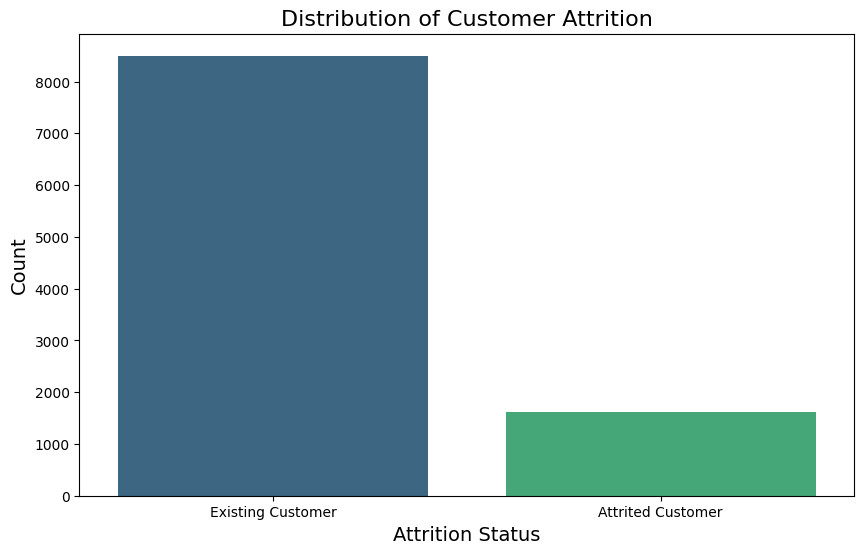

In [ ]:
# Visualize churn distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition_Flag', data=df, palette='viridis')
plt.title('Distribution of Customer Attrition', fontsize=16)
plt.xlabel('Attrition Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
# Analyze categorical variables
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

<Figure size 1200x600 with 0 Axes>

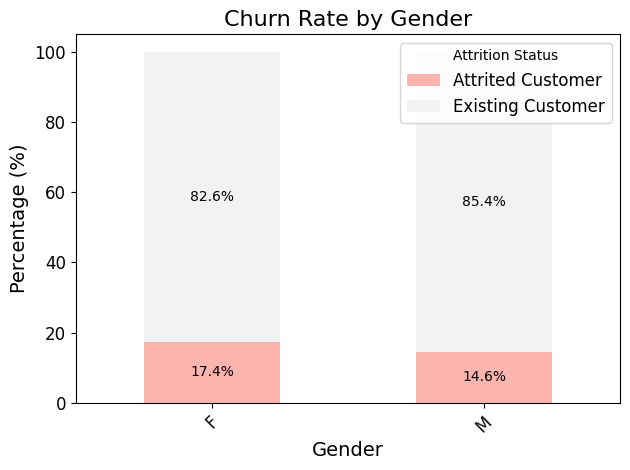

<Figure size 1200x600 with 0 Axes>

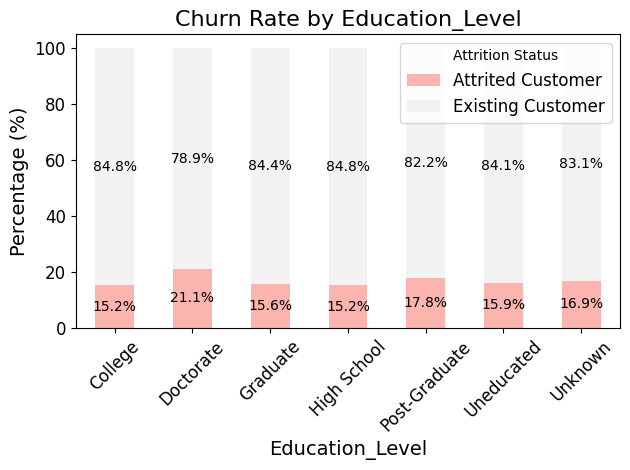

<Figure size 1200x600 with 0 Axes>

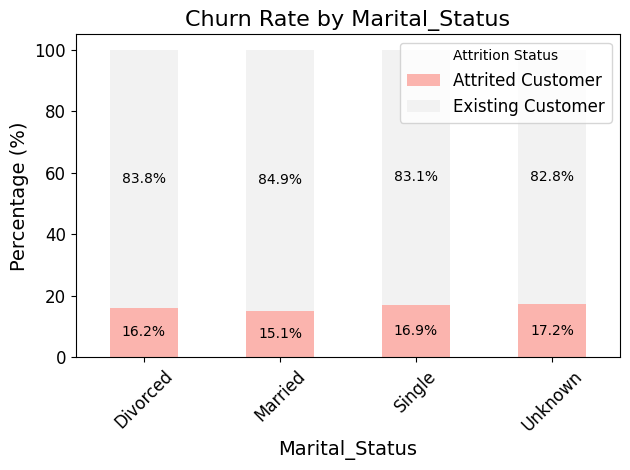

<Figure size 1200x600 with 0 Axes>

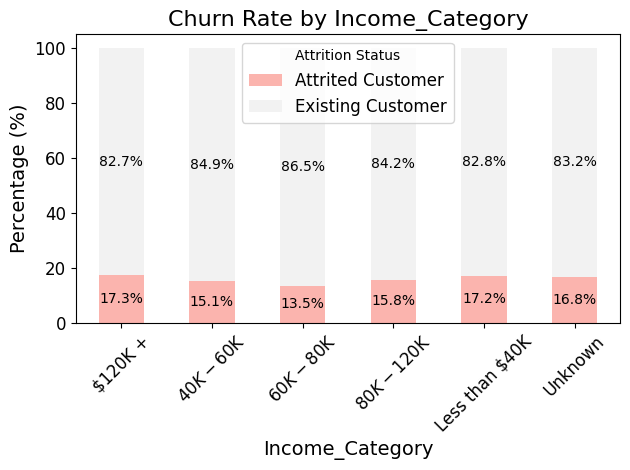

<Figure size 1200x600 with 0 Axes>

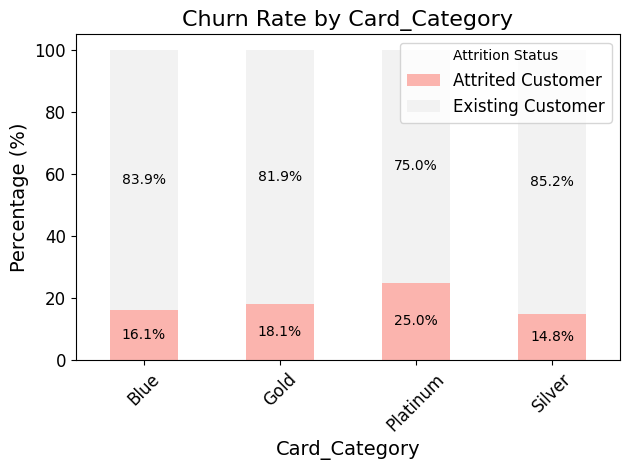

In [ ]:
# Create a function to plot categorical variables against churn
def plot_categorical_vs_churn(df, column):
    plt.figure(figsize=(12, 6))

    # Calculate percentages
    temp_df = pd.crosstab(df[column], df['Attrition_Flag'], normalize='index') * 100

    # Plot
    ax = temp_df.plot(kind='bar', stacked=True, colormap='Pastel1')
    plt.title(f'Churn Rate by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Add percentage labels
    for i, p in enumerate(ax.patches):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 5:  # Only show labels for segments > 5%
            ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2),
                        ha='center', va='center', fontsize=10)

    plt.legend(title='Attrition Status', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot each categorical variable against churn
for col in categorical_cols:
    plot_categorical_vs_churn(df, col)

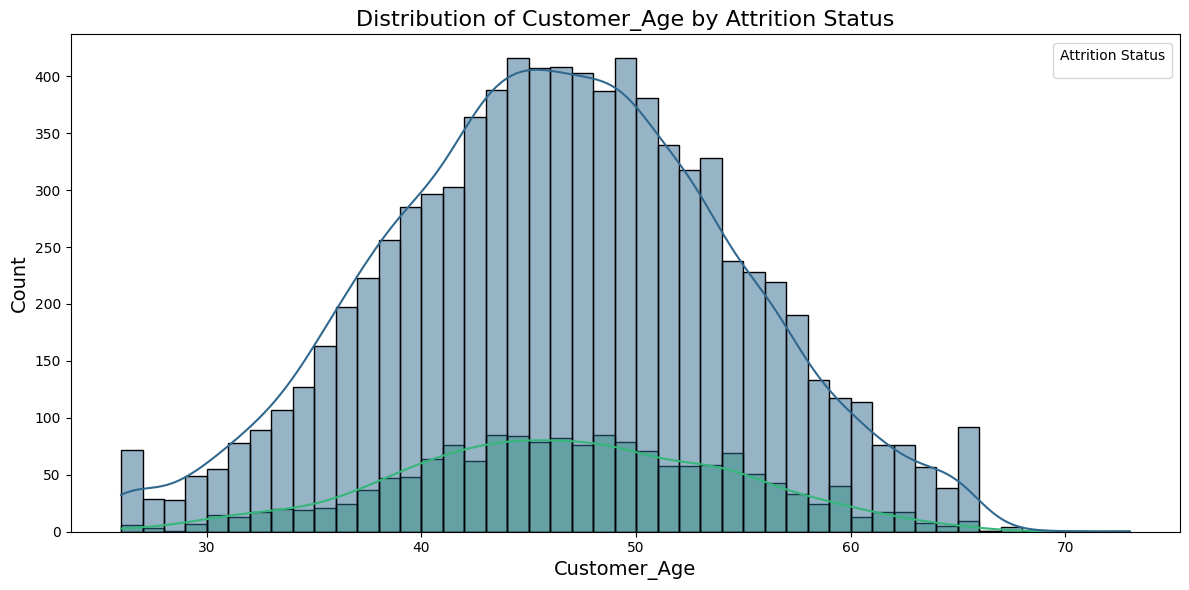

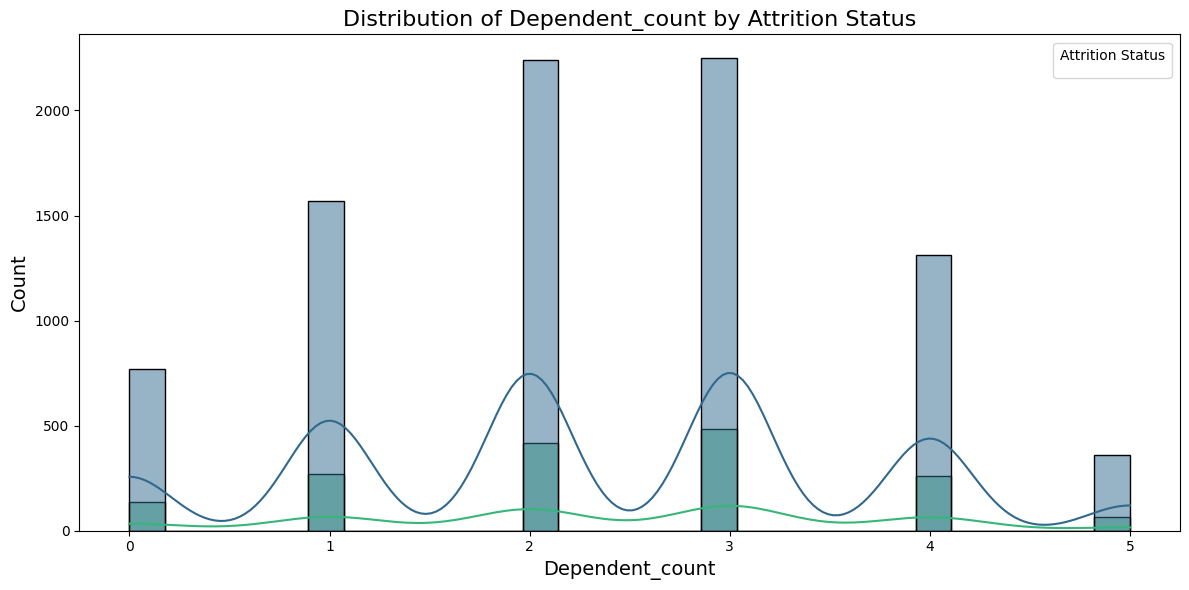

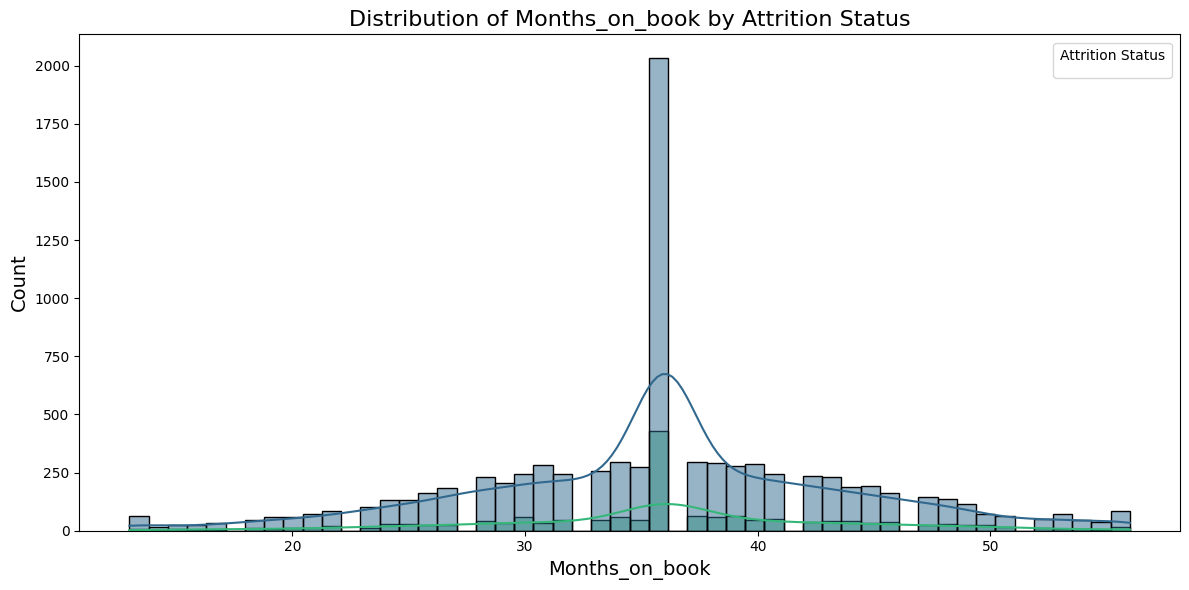

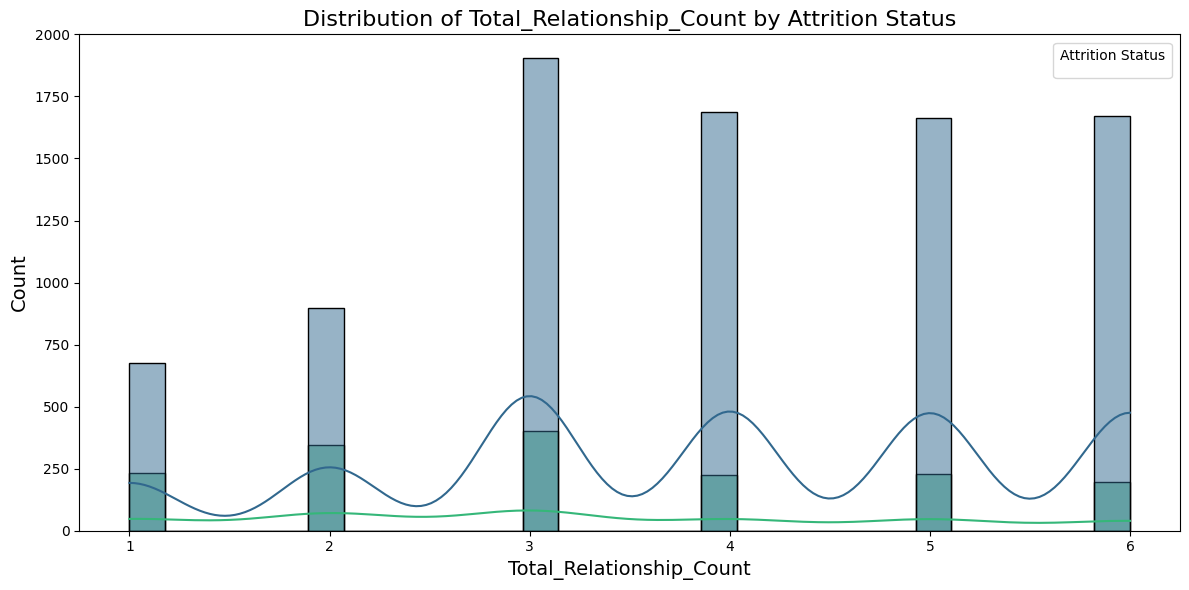

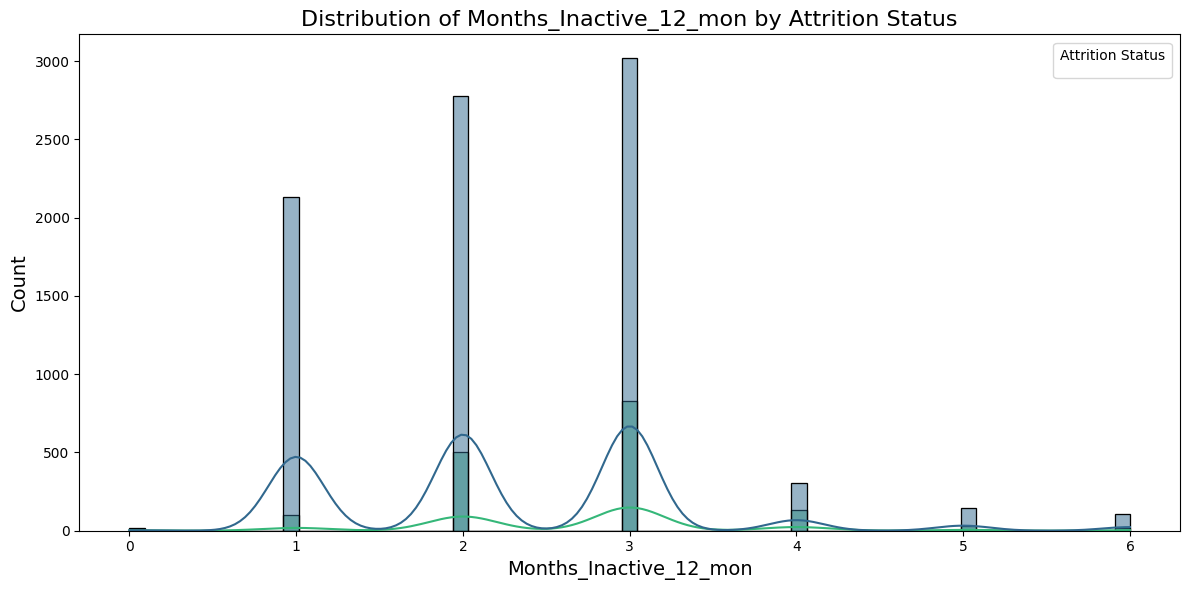

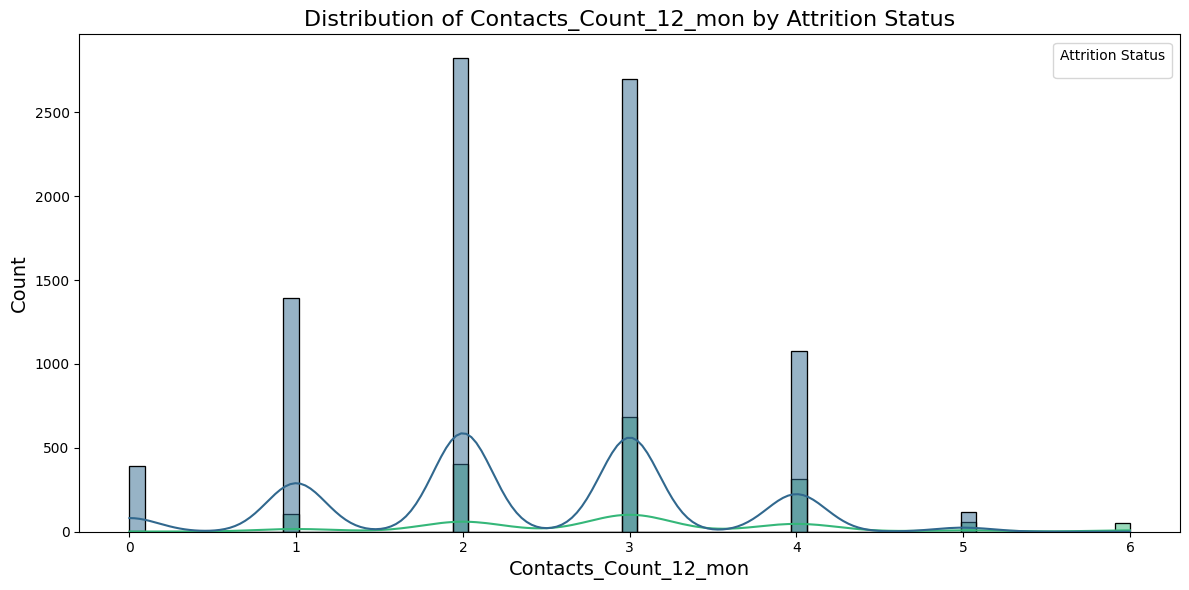

In [ ]:
# Analyze numerical variables
numerical_cols = df.select_dtypes(include=['number']).columns.drop('Churn').tolist()

# Create distribution plots for numerical variables by churn status
for col in numerical_cols[:6]:  # First 6 numerical columns
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, hue='Attrition_Flag', kde=True, palette='viridis')
    plt.title(f'Distribution of {col} by Attrition Status', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Attrition Status', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Refresh numerical_cols to match current df
numerical_cols = [c for c in numerical_cols if c in df.columns]

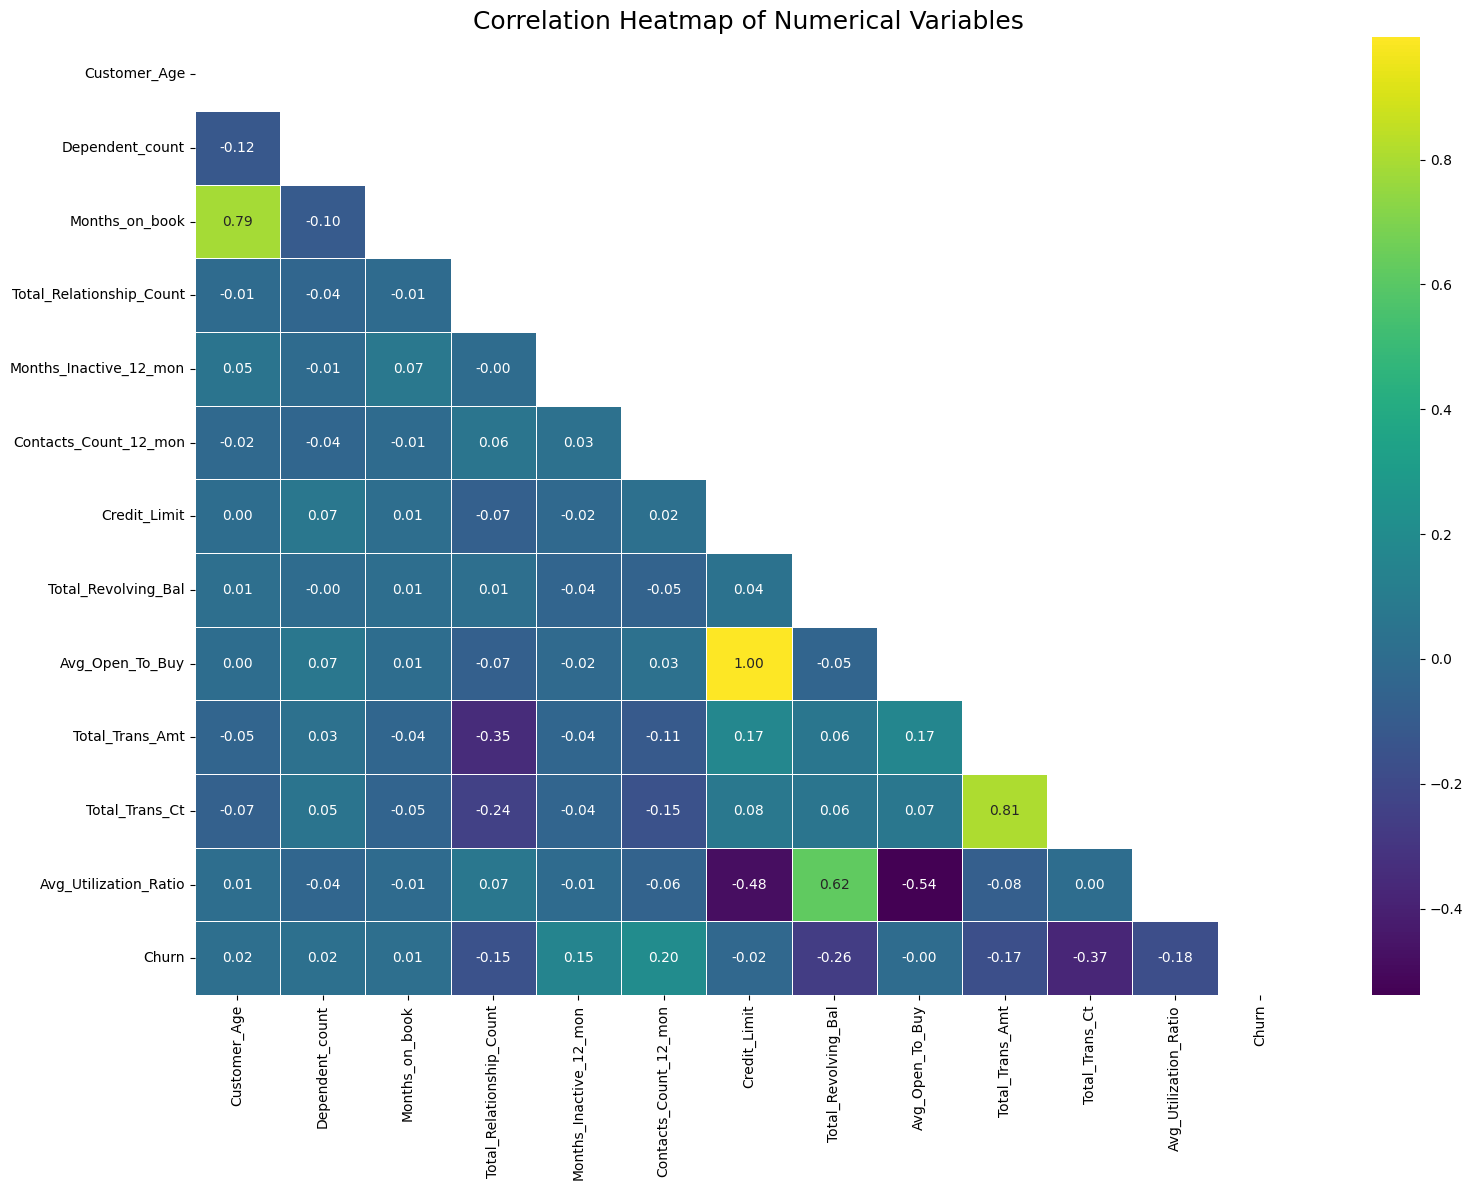

In [ ]:
# Create correlation heatmap
plt.figure(figsize=(16, 12))
correlation = df[numerical_cols + ['Churn']].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='viridis', mask=mask, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=18)
plt.tight_layout()
plt.show()

##Machine Learning

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import shap

In [ ]:
# Data Preprocessing
# Remove unnecessary columns
leaky_cols = [c for c in df.columns if 'Naive_Bayes' in c]
df = df.drop(columns=leaky_cols)

In [ ]:
# Convert target variable to binary
df['Churn'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
df = df.drop(columns=['Attrition_Flag'])

In [ ]:
# Split features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# Encode categorical features
cat_cols = X.select_dtypes(include=['object','category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Now do your split and SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Feature Engineering
def add_engineered_features(df):
    df_new = df.copy()

    # Interaction between transaction amount and count
    df_new['Trans_Amt_per_Count'] = df_new['Total_Trans_Amt'] / (df_new['Total_Trans_Ct'] + 1)

    # Interaction between revolving balance and credit limit
    df_new['Revolving_to_Credit_Ratio'] = df_new['Total_Revolving_Bal'] / (df_new['Credit_Limit'] + 1)

    # Interaction between inactive months and contacts
    df_new['Inactive_to_Contacts_Ratio'] = df_new['Months_Inactive_12_mon'] / (df_new['Contacts_Count_12_mon'] + 1)

    # Change in transaction metrics
    #df_new['Trans_Amt_to_Count_Change'] = df_new['Total_Amt_Chng_Q4_Q1'] / (df_new['Total_Ct_Chng_Q4_Q1'] + 1)

    # Customer tenure relative to age
    df_new['Tenure_to_Age_Ratio'] = df_new['Months_on_book'] / (df_new['Customer_Age'] * 12)

    return df_new

In [ ]:
X_train_engineered = add_engineered_features(X_train)
X_test_engineered = add_engineered_features(X_test)

In [ ]:
numerical_cols_engineered = X_train_engineered.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_engineered = X_train_engineered.select_dtypes(include=['object']).columns.tolist()

In [ ]:
preprocessor_engineered = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_engineered),
        ('cat', categorical_transformer, categorical_cols_engineered)
    ])

In [ ]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


Logistic Regression Performance:
Accuracy: 0.8480
Precision: 0.5169
Recall: 0.8000
F1 Score: 0.6280
ROC AUC: 0.9138


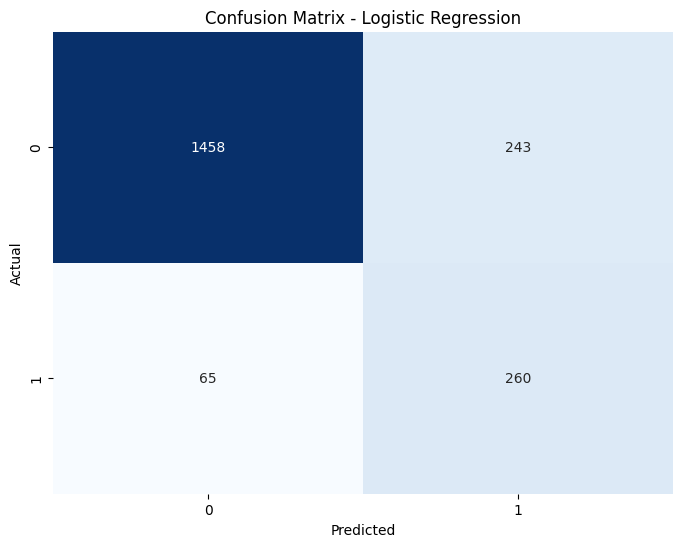

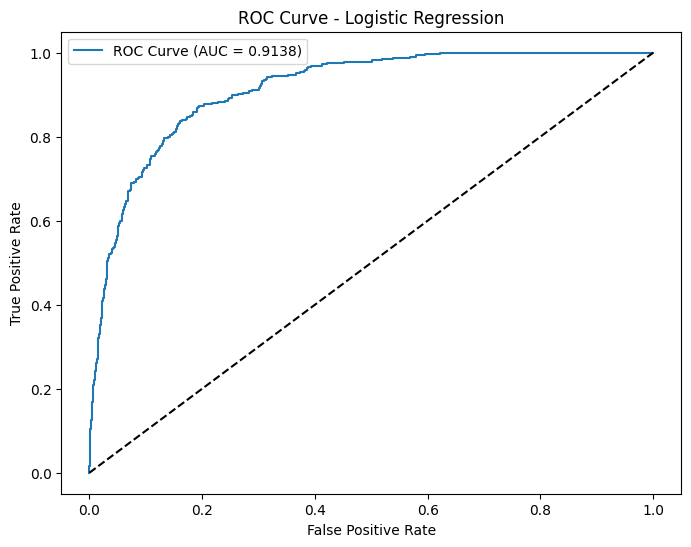


Decision Tree Performance:
Accuracy: 0.9131
Precision: 0.6915
Recall: 0.8277
F1 Score: 0.7535
ROC AUC: 0.8786


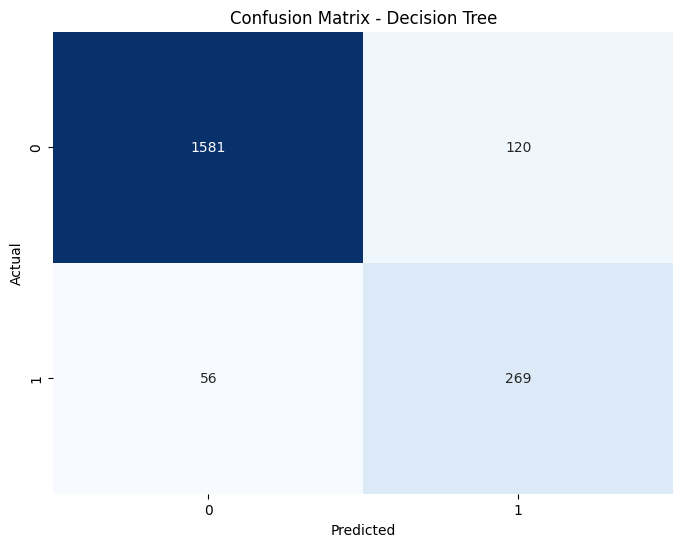

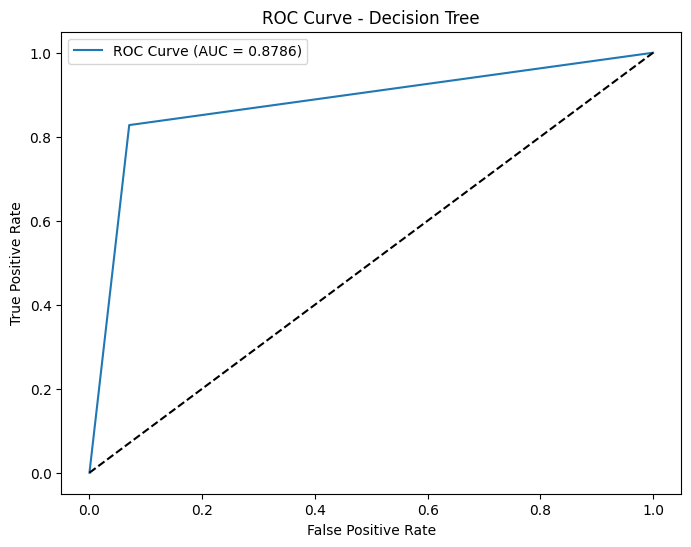


Random Forest Performance:
Accuracy: 0.9373
Precision: 0.7750
Recall: 0.8585
F1 Score: 0.8146
ROC AUC: 0.9769


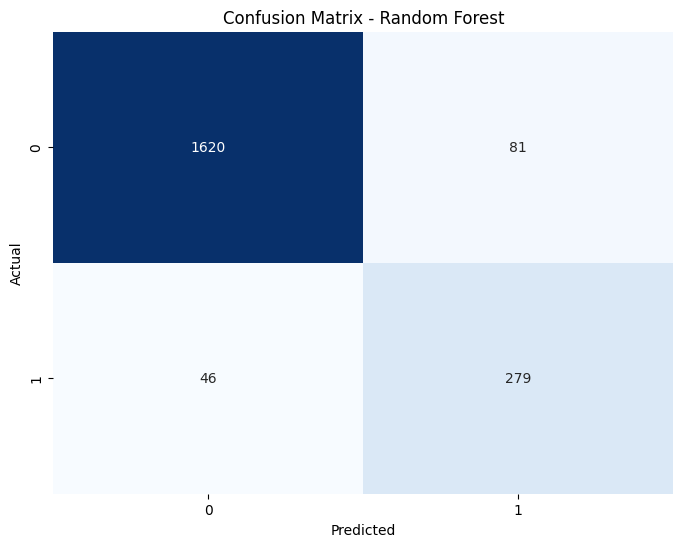

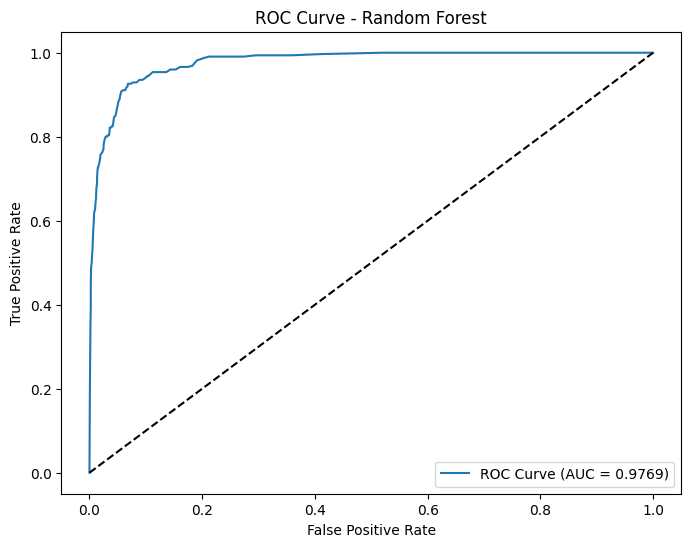


Gradient Boosting Performance:
Accuracy: 0.9314
Precision: 0.7385
Recall: 0.8862
F1 Score: 0.8056
ROC AUC: 0.9757


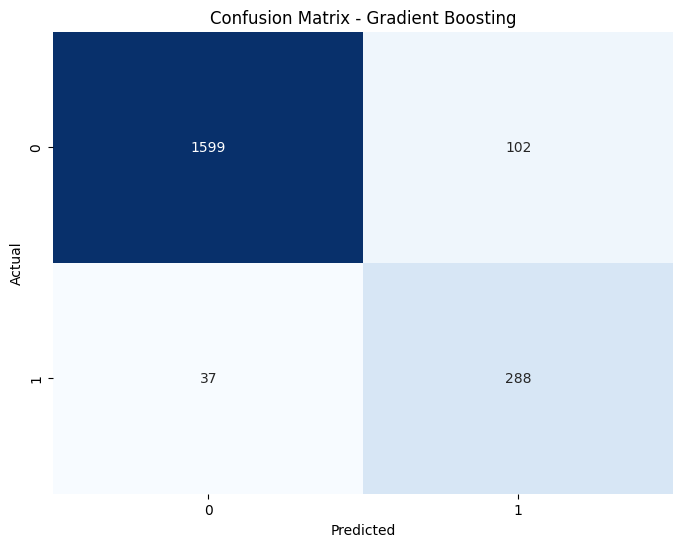

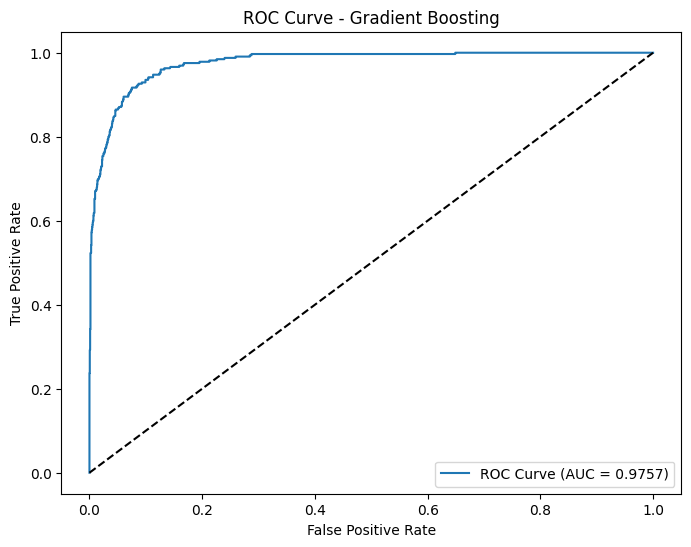


XGBoost Performance:
Accuracy: 0.9398
Precision: 0.7875
Recall: 0.8554
F1 Score: 0.8201
ROC AUC: 0.9754


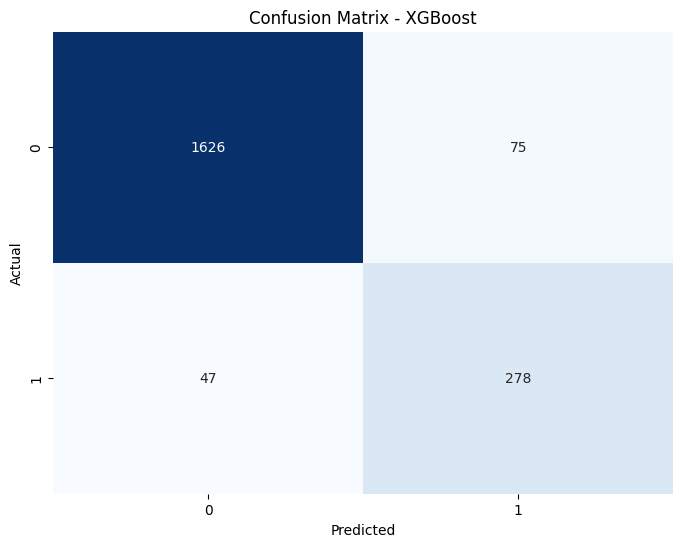

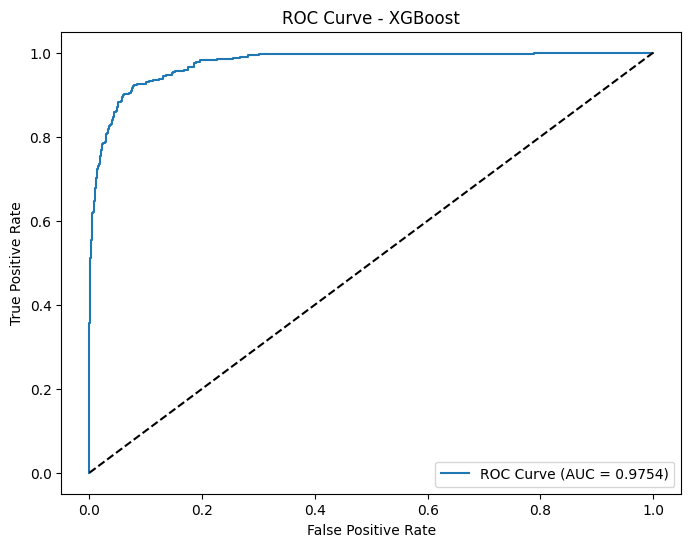

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    from sklearn.feature_selection import SelectFromModel
    pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor_engineered),
      ('feature_selection', SelectFromModel(
        estimator=XGBClassifier(random_state=42),
        threshold='median'
      )),
      ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Create ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    return {
        'model_name': model_name,
        'pipeline': pipeline,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_engineered, X_test_engineered, y_train, y_test, name)

In [ ]:
# Compare models
model_comparison = pd.DataFrame({
    'Model': [name for name in results.keys()],
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Precision': [results[name]['precision'] for name in results.keys()],
    'Recall': [results[name]['recall'] for name in results.keys()],
    'F1 Score': [results[name]['f1'] for name in results.keys()],
    'ROC AUC': [results[name]['roc_auc'] for name in results.keys()]
})

In [ ]:
model_comparison = model_comparison.sort_values('ROC AUC', ascending=False)
print("\nModel Comparison:")
print(model_comparison)


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
2        Random Forest  0.937315   0.775000  0.858462  0.814599  0.976903
3    Gradient Boosting  0.931392   0.738462  0.886154  0.805594  0.975675
4              XGBoost  0.939783   0.787535  0.855385  0.820059  0.975363
0  Logistic Regression  0.847976   0.516899  0.800000  0.628019  0.913806
1        Decision Tree  0.913129   0.691517  0.827692  0.753501  0.878573


In [ ]:
# Select the best model (XGBoost)
best_model_name = model_comparison.iloc[0]['Model']
best_model = results[best_model_name]['pipeline']

In [ ]:
# ——— Choose hyper‐parameters to tune based on which model won ———
if best_model_name == 'XGBoost':
    param_grid = {
        'model__n_estimators':    [100, 200, 300],
        'model__learning_rate':   [0.01, 0.1, 0.2],
        'model__max_depth':       [3, 5, 7],
        'model__subsample':       [0.8, 0.9, 1.0],
        'model__colsample_bytree':[0.8, 0.9, 1.0]
    }

elif best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth':   [None, 10, 20, 30],
        'model__max_features':['auto','sqrt','log2']
    }

else:
    # fallback for any other tree‐based model
    param_grid = {
        'model__n_estimators': [50, 100],
        'model__max_depth':   [3, 5]
    }


In [ ]:
tuning_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_engineered),
    ('model', models[best_model_name])
])

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    tuning_pipeline,
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_search.fit(X_train_engineered, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_Age',
                                                                          'Dependent_count',
                                                                          'Months_on_book',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'C...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(f"\nBest parameters: {best_params}")
print(f"Best cross-validation ROC AUC: {best_score:.4f}")


Best parameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 300}
Best cross-validation ROC AUC: 0.9955


In [ ]:
# Train the final model with the best parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train_engineered, y_train)

from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_model, X_train_engineered, y_train, cv=cv, scoring='roc_auc')
print(f"Cross-validated ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated ROC AUC: 0.9955 ± 0.0006


In [ ]:
# Evaluate the final model
y_pred_final = final_model.predict(X_test_engineered)
y_pred_proba_final = final_model.predict_proba(X_test_engineered)[:, 1]

accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_proba_final)

print("\nFinal Tuned Model Performance:")
from sklearn.model_selection import train_test_split
X_rest, X_hold, y_rest, y_hold = train_test_split(
    X, y, test_size=0.05, random_state=42, stratify=y
)
X_hold_eng = add_engineered_features(X_hold)
y_hold_prob = final_model.predict_proba(X_hold_eng)[:, 1]
print(f"Hold-out ROC AUC: {roc_auc_score(y_hold, y_hold_prob):.4f}")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")
print(f"ROC AUC: {roc_auc_final:.4f}")

import plotly.graph_objects as go
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
fig = go.Figure(data=go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.update_layout(
    title='Interactive ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate'
)
fig.show()


Final Tuned Model Performance:
Hold-out ROC AUC: 0.9865
Accuracy: 0.9403
Precision: 0.7931
Recall: 0.8492
F1 Score: 0.8202
ROC AUC: 0.9778


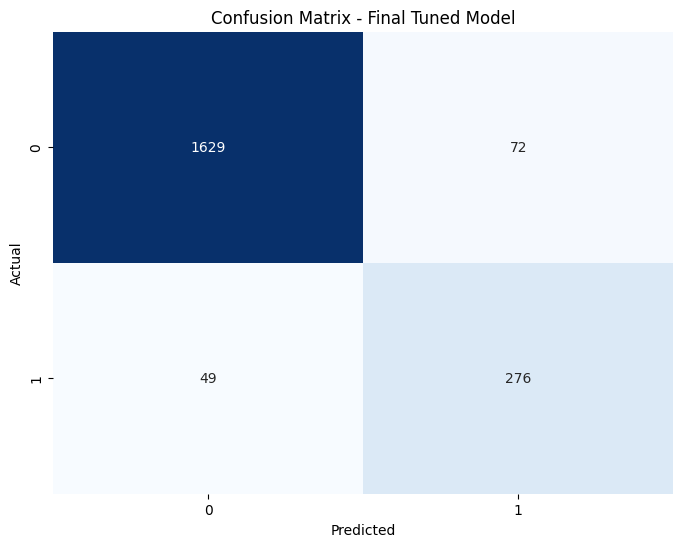

In [ ]:
# Create confusion matrix for the final model
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Final Tuned Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Feature importance analysis
# Get feature names after preprocessing
preprocessor_fitted = final_model.named_steps['preprocessor'].fit(X_train_engineered)
feature_names = []

# Get numerical feature names
numerical_features = numerical_cols_engineered
feature_names.extend(numerical_features)

# Get categorical feature names (this is simplified)
categorical_features = []
for cat_col in categorical_cols_engineered:
    unique_values = X_train_engineered[cat_col].unique()
    for val in unique_values[1:]:  # Skip first value due to drop='first'
        categorical_features.append(f"{cat_col}_{val}")
feature_names.extend(categorical_features)

In [ ]:
# Extract feature importance
model = final_model.named_steps['model']
importances = model.feature_importances_

# Create a DataFrame for feature importance (simplified)
feature_importance = pd.DataFrame({
    'Feature': feature_names[:len(importances)],  # Ensure lengths match
    'Importance': importances
})

feature_importance = feature_importance.sort_values('Importance', ascending=False)

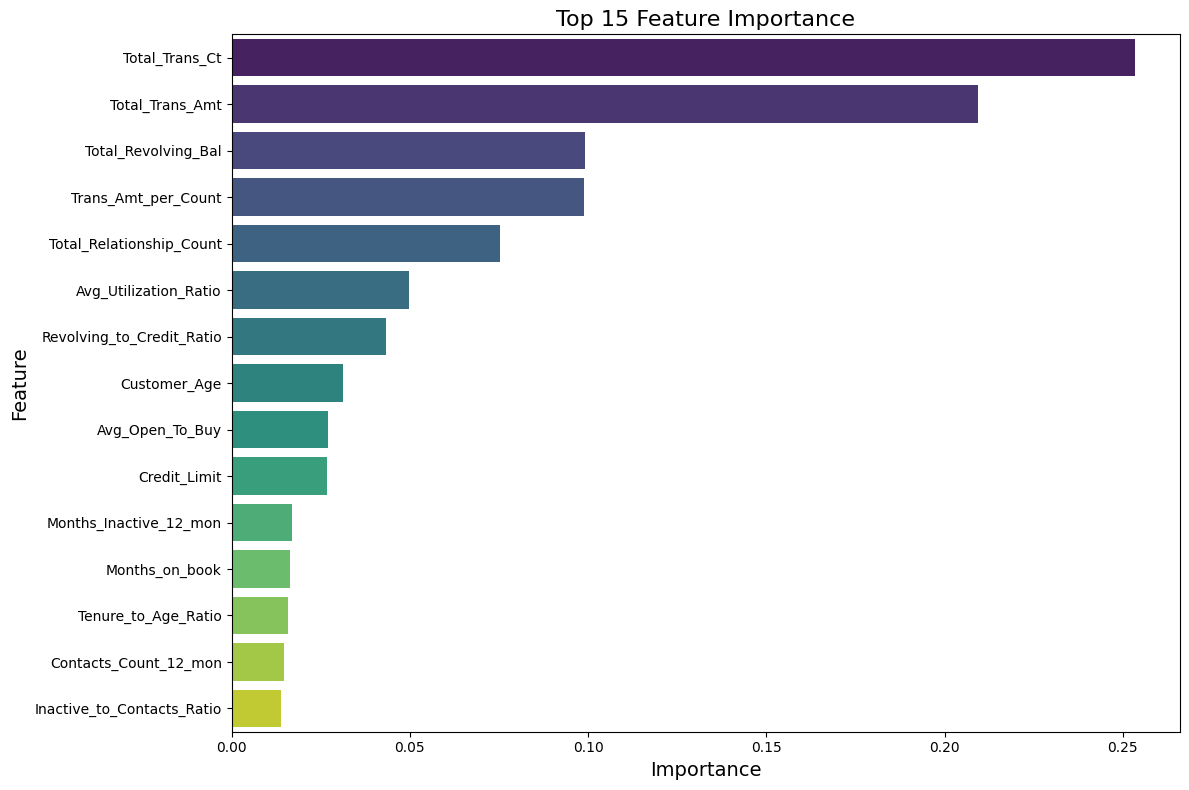

In [ ]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

##Gemini API Integration

In [ ]:
# Install required packages
!pip install -q google-generativeai

# Import libraries
import google.generativeai as genai
from IPython.display import display, Markdown

In [ ]:
# Function to configure Gemini API
def configure_gemini_api(api_key):
    genai.configure(api_key=api_key)

    # Set up the model configuration
    generation_config = {
        "temperature": 0.7,
        "top_p": 0.95,
        "top_k": 64,
        "max_output_tokens": 8192,
    }

    # Create the model
    model = genai.GenerativeModel(
        model_name="gemini-2.0-flash",
        generation_config=generation_config
    )

    return model

In [ ]:
# Enter your Gemini API key here
api_key = "Your API Key"
gemini_model = configure_gemini_api(api_key)

In [ ]:
top_feats = (
    feature_importance
      .sort_values('Importance', ascending=False)
      .head(5)
      .apply(lambda row: f"{row.Feature} ({row.Importance:.3f})", axis=1)
      .tolist()
)

insight_prompt = f"""
I built an XGBoost churn model with held-out ROC AUC of {roc_auc_final:.2f}.
The top 5 drivers of churn are: {top_feats}.
Based on these insights, provide three strategic, data-backed recommendations
for Capital One to reduce customer churn.
"""

insight_response = gemini_model.generate_content(insight_prompt)
insight = insight_response.text

from IPython.display import display, Markdown
display(Markdown(insight))

Okay, a ROC AUC of 0.98 on a held-out set is excellent!  Based on the XGBoost model's top drivers, here are three strategic, data-backed recommendations for Capital One to reduce customer churn:

**1.  Targeted Rewards and Engagement Programs Based on Transaction Activity:**

*   **Data Insight:** 'Total_Trans_Ct (0.253)' and 'Total_Trans_Amt (0.209)' are the strongest churn predictors.  This suggests customers who are less active or spending less are at high risk.

*   **Recommendation:** Implement a tiered rewards program that incentivizes increased transaction activity and spending.
    *   **Tiered Structure:**  Design tiers based on monthly/quarterly transaction counts and amounts.  Example: "Bronze," "Silver," "Gold," and "Platinum" levels.
    *   **Tier Benefits:** Offer progressively better rewards as customers move up the tiers. Rewards could include:
        *   **Bonus Rewards Points/Cash Back:** Higher earn rates on purchases.
        *   **Statement Credits:**  Targeted credits for reaching certain spending thresholds.
        *   **Access to Exclusive Experiences:**  Priority access to events, concerts, or travel deals.
        *   **Fee Waivers:**  Annual fee waivers or late payment fee forgiveness for higher tiers.
        *   **Personalized Offers:**  Targeted offers based on past spending habits.
    *   **Proactive Engagement:**  Send personalized emails or in-app notifications congratulating customers on reaching new tiers and highlighting the benefits.  Also, proactively reach out to customers whose transaction activity is declining with targeted offers to encourage them to use their card more.
    *   **"Reactivation" Campaign:** For customers with significantly decreased transaction activity, launch a targeted "reactivation" campaign with a strong incentive to use their card again (e.g., a one-time bonus rewards offer).

*   **Data-Driven Approach:**  
    *   **A/B Test:**  Test different reward structures and offer types to identify the most effective incentives for driving engagement and reducing churn.
    *   **Segmentation:**  Segment customers based on their spending patterns and risk of churn to tailor the reward program to their specific needs and preferences.
    *   **Monitor Performance:**  Closely track the impact of the program on transaction activity, spending, and churn rates.

**2.  Balance Management and Credit Line Optimization:**

*   **Data Insight:** 'Total_Revolving_Bal (0.099)' is a significant churn driver.  High revolving balances often indicate financial stress, which can lead to customer dissatisfaction and ultimately, churn.

*   **Recommendation:** Offer proactive balance management tools and credit line optimization options.
    *   **Balance Transfer Offers:**  Target customers with high revolving balances on other cards with attractive balance transfer offers to consolidate debt and lower interest rates.
    *   **Credit Line Increases:**  Proactively offer credit line increases to responsible cardholders with a history of on-time payments and good credit utilization.  A higher credit line can reduce credit utilization and improve credit scores.
    *   **Personalized Financial Education:**  Provide personalized financial education resources and tools to help customers manage their debt, improve their credit scores, and make informed financial decisions.  This could include articles, videos, or online calculators.
    *   **Budgeting Tools:**  Integrate budgeting tools into the Capital One app or website to help customers track their spending, set financial goals, and avoid overspending.
    *   **Alerts and Notifications:**  Implement alerts and notifications to help customers stay on top of their balances and avoid late payments.  Examples include:
        *   **Low Balance Alerts:**  Alerts when the balance is approaching the credit limit.
        *   **Payment Due Reminders:**  Reminders before the payment due date.
        *   **High Spending Alerts:**  Alerts when spending exceeds a pre-defined threshold.

*   **Data-Driven Approach:**
    *   **Identify At-Risk Customers:**  Use machine learning to identify customers who are at risk of struggling with their revolving balances based on factors such as credit utilization, payment history, and demographic data.
    *   **Personalized Offers:**  Tailor balance transfer offers and credit line increase offers to each customer's individual needs and financial situation.
    *   **Monitor Credit Health:**  Track customers' credit scores and credit utilization rates to identify those who may benefit from balance management tools or credit line increases.

**3.  Enhance Relationship and Customer Service Interaction Quality:**

*   **Data Insight:** 'Total_Relationship_Count (0.075)' indicates customers with fewer relationships (e.g., fewer Capital One products, less interaction) are more likely to churn. 'Trans_Amt_per_Count (0.099)' could mean customers find too much hassle in each transaction (poor customer service, confusing processes, etc.).

*   **Recommendation:** Focus on strengthening customer relationships and improving the overall customer experience.
    *   **Proactive Customer Service:**  Implement a proactive customer service model where Capital One reaches out to customers before they encounter problems.  This could include:
        *   **Welcome Calls:**  Reach out to new cardholders to welcome them and answer any questions they may have.
        *   **Check-In Calls:**  Periodically check in with existing cardholders to see how they are doing and if they need any assistance.
        *   **Personalized Recommendations:**  Offer personalized recommendations for products and services based on their needs and preferences.
    *   **Omnichannel Support:**  Provide seamless customer service across all channels, including phone, email, chat, and social media.  Ensure that customers can easily switch between channels without having to repeat themselves.
    *   **Improved Customer Service Training:**  Invest in training for customer service representatives to improve their communication skills, product knowledge, and ability to resolve customer issues effectively.
    *   **Streamlined Processes:**  Identify and address any pain points in the customer journey, such as complicated application processes, confusing billing statements, or slow customer service response times.
    *   **Loyalty Programs:**  Implement a loyalty program that rewards customers for their continued business and engagement with Capital One.
    *   **Gather Feedback:**  Actively solicit customer feedback through surveys, focus groups, and online reviews to identify areas for improvement.

*   **Data-Driven Approach:**
    *   **Analyze Customer Interactions:**  Analyze customer service interactions to identify common issues and areas where customer service can be improved.
    *   **Track Customer Satisfaction:**  Regularly track customer satisfaction scores to measure the effectiveness of customer service initiatives.
    *   **Personalized Communication:**  Use data to personalize customer communications and tailor them to each customer's individual needs and preferences.
    *   **Monitor Product Usage:** Track how customers are using their Capital One products and services to identify opportunities to offer personalized support and guidance.

**Important Considerations:**

*   **Correlation, Not Causation:**  While these variables are strong predictors, remember correlation doesn't equal causation.  These insights point to areas to investigate further.  You need to understand *why* these factors are leading to churn.
*   **Further Investigation:**  Dig deeper into *why* these factors are drivers.  For example, why is "Total_Trans_Ct" so important? Are customers leaving because they find better rewards elsewhere?  Are fees too high? Is the app difficult to use?
*   **Ethical Considerations:** Be mindful of potential biases in your model and ensure that your recommendations are fair and equitable for all customers. Avoid discriminatory practices based on sensitive attributes.
*   **Holistic Approach:** Churn is rarely driven by a single factor.  These recommendations should be implemented as part of a comprehensive customer retention strategy.
*   **Continuous Monitoring and Adaptation:** The market and customer behavior are constantly evolving.  Continuously monitor the performance of your churn model and adapt your strategies accordingly.

By focusing on these data-backed recommendations, Capital One can significantly reduce customer churn and improve customer loyalty. Remember to continually analyze the data and adapt your strategies as needed to stay ahead of the curve. Good luck!


In [ ]:
# For demonstration, we'll use a sample customer
sample_customer = {
    'Customer_Age': 45,
    'Gender': 'F',
    'Income_Category': '$80K - $120K',
    'Card_Category': 'Blue',
    'Months_on_book': 36,
    'Total_Relationship_Count': 2,
    'Months_Inactive_12_mon': 3,
    'Contacts_Count_12_mon': 4,
    'Credit_Limit': 12000,
    'Total_Revolving_Bal': 1500,
    'Avg_Utilization_Ratio': 0.125,
    'Total_Trans_Amt': 2500,
    'Total_Trans_Ct': 45,
    'Total_Ct_Chng_Q4_Q1': 0.5,
    'Total_Amt_Chng_Q4_Q1': 0.6
}

In [ ]:
# Simulate churn probability and feature importance
churn_probability = 0.75
feature_importance = {
    'Total_Trans_Ct': 0.35,
    'Total_Revolving_Bal': -0.28,
    'Total_Relationship_Count': 0.18,
    'Total_Ct_Chng_Q4_Q1': 0.12,
    'Total_Trans_Amt': 0.15
}

In [ ]:
# Format top features for the prompt
top_features_text = "\n".join([f"- {feature}: {'Increases' if value > 0 else 'Decreases'} churn risk by {abs(value):.2f}"
                              for feature, value in sorted(feature_importance.items(),
                                                         key=lambda x: abs(x[1]),
                                                         reverse=True)[:5]])

In [ ]:
# Function to generate personalized retention strategies
def generate_retention_strategies(gemini_model, customer_data, prediction_prob, top_features):
    # Create a prompt for Gemini
    prompt = f"""
    You are an AI assistant for Capital One's customer retention team. Your task is to generate personalized retention strategies for a customer who has been identified as at-risk for churning.

    ## Customer Profile:
    - Age: {customer_data['Customer_Age']}
    - Gender: {customer_data['Gender']}
    - Income Category: {customer_data['Income_Category']}
    - Card Category: {customer_data['Card_Category']}
    - Months as Customer: {customer_data['Months_on_book']}
    - Total Products: {customer_data['Total_Relationship_Count']}
    - Months Inactive (12 mo): {customer_data['Months_Inactive_12_mon']}
    - Contacts Count (12 mo): {customer_data['Contacts_Count_12_mon']}
    - Credit Limit: ${customer_data['Credit_Limit']}
    - Total Revolving Balance: ${customer_data['Total_Revolving_Bal']}
    - Average Utilization Ratio: {customer_data['Avg_Utilization_Ratio']}
    - Total Transaction Amount: ${customer_data['Total_Trans_Amt']}
    - Total Transaction Count: {customer_data['Total_Trans_Ct']}

    ## Churn Prediction:
    - Probability of Churn: {prediction_prob:.2%}

    ## Top Factors Contributing to Churn Risk:
    {top_features}

    ## Task:
    Based on this customer's profile and the factors contributing to their churn risk, generate a personalized retention strategy. Include:

    1. A summary of why this customer is likely to churn (2-3 sentences)
    2. 3-5 specific, actionable retention recommendations tailored to this customer's profile
    3. Suggested timing and communication channel for each recommendation
    4. Expected impact of these interventions on reducing churn risk

    Format your response as a structured retention plan that a Capital One retention specialist could implement.
    """

    # Generate response from Gemini
    response = gemini_model.generate_content(prompt)

    return response.text

In [ ]:
# Generate and display retention strategy
retention_strategy = generate_retention_strategies(
    gemini_model,
    sample_customer,
    churn_probability,
    top_features_text
)

display(Markdown("# Personalized Retention Strategy"))
display(Markdown(retention_strategy))

# Personalized Retention Strategy

## Capital One Customer Retention Plan: [Customer ID - To Be Inserted]

**Customer Profile Summary:** This 45-year-old female customer with a Blue card and an income between $80K-$120K has been with Capital One for 36 months and has two products with us. While she maintains a healthy credit utilization ratio and a manageable revolving balance, her recent activity suggests a potential decline in engagement, contributing to a high churn probability. Specifically, a lower than expected transaction count and amount relative to her credit limit are raising concerns.

**Churn Risk Summary:** This customer is at a high risk of churning (75.00%). Key factors contributing to this risk are a relatively low total transaction count and amount, which may suggest she's not finding the card valuable enough for her spending habits. The increased customer service contact count in the past year is also concerning, indicating potential dissatisfaction or unresolved issues.

**Retention Strategy:**

Here's a personalized retention strategy designed to address the specific factors driving this customer's churn risk:

**Recommendation 1: Proactive Spending Incentive**

*   **Action:** Offer a targeted spending incentive. Based on her credit limit and past spending, offer a bonus rewards offer. For example, "Earn an extra 2x rewards on all purchases up to $500 in the next 3 months." This incentivizes increased card usage.
*   **Timing:** Within 7 days of churn risk assessment.
*   **Communication Channel:** Personalized email with a visually appealing design highlighting the offer and its benefits.
*   **Expected Impact:** This addresses the low transaction count and amount, encouraging her to use the card more frequently and demonstrating its value. It leverages her available credit and rewards her for increased spending. Expected churn risk reduction: 10-15%.

**Recommendation 2: Relationship Review & Product Optimization**

*   **Action:** Schedule a brief phone call with a Capital One representative to review her current products and financial goals. Explore if she is using her card for the right purposes. Also, assess her satisfaction with her current card and explore if an upgrade to a rewards card with more relevant benefits (travel, dining, etc.) would be more suitable.
*   **Timing:** 14 days after sending the spending incentive email. The phone call should be scheduled at a time convenient for the customer.
*   **Communication Channel:** Follow up email and SMS text message reminding her of the call schedule.
*   **Expected Impact:** Addresses potential dissatisfaction with her current card offering. Proactively identifying and addressing her specific needs and potentially offering a more suitable card can increase her satisfaction and engagement. Expected churn risk reduction: 15-20%.

**Recommendation 3: Address Customer Service Concerns**

*   **Action:** Review the records of her previous customer service contacts (4 contacts in the past 12 months) and proactively reach out to ensure those issues were fully resolved to her satisfaction. Offer a sincere apology for any inconvenience caused.
*   **Timing:** Immediately after the Relationship Review phone call.
*   **Communication Channel:** The same Capital One representative who conducted the Relationship Review phone call should handle this.
*   **Expected Impact:** Demonstrates that Capital One values her business and is committed to resolving any issues she may have experienced. Addressing past concerns can significantly improve her perception of Capital One and reduce churn risk. Expected churn risk reduction: 10-15%.

**Recommendation 4: Showcase Capital One's Value Proposition**

*   **Action:** Send a series of 2-3 targeted emails over the next month highlighting the benefits of being a Capital One customer, focusing on aspects that might resonate with her profile (e.g., security features, mobile app functionality, access to Capital One Shopping, fraud protection, and price protection).
*   **Timing:** Starting 7 days after the Relationship Review and Customer Service follow up. Spread the emails out over a month.
*   **Communication Channel:** Email.
*   **Expected Impact:** Reinforces the value proposition of being a Capital One customer beyond just the card itself. This reminds her of the broader benefits and services available to her. Expected churn risk reduction: 5-10%.

**Overall Expected Impact:**

By implementing these personalized retention strategies, we aim to reduce the customer's churn risk by 40-60%. This multi-faceted approach addresses the key factors contributing to her churn risk, proactively demonstrates Capital One's commitment to her satisfaction, and reinforces the value of her relationship with us. Continuous monitoring of her account activity and feedback after each intervention will be crucial to further refine our retention efforts.


##Interactive Visualizations

In [126]:
# Create a proper subplot grid first
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[
        [{"type": "indicator"}, {"type": "bar"}],
        [{"type": "bar"},       {"type": "bar"}]
    ],
    subplot_titles=(
        'Overall Churn Rate',
        'Churn Rate by Card Category',
        'Churn Rate by Income Category',
        'Churn Rate by Customer Age Group'
    )
)

# Add the gauge chart to the first subplot (row 1, col 1)
fig.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=churn_rate * 100,
        title={'text': "Overall Churn Rate (%)"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "#D03027"},
            'steps': [
                {'range': [0, 5], 'color': "#c7e9c0"},
                {'range': [5, 15], 'color': "#a1d99b"},
                {'range': [15, 25], 'color': "#ffeda0"},
                {'range': [25, 50], 'color': "#feb24c"},
                {'range': [50, 100], 'color': "#fc4e2a"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': churn_rate * 100
            }
        }
    ),
    row=1, col=1
)

def get_color_for_value(value):
    if value >= 25: return "#D03027"
    elif value >= 18: return "#FFB81C"
    else: return "#4CAF50"
# Add the card category bar chart (row 1, col 2)
for card in df['Card_Category'].unique():
    card_churn = df[df['Card_Category'] == card]['Churn'].mean() * 100
    fig.add_trace(
        go.Bar(
            x=[card],
            y=[card_churn],
            name=card,
            text=f"{card_churn:.1f}%",
            textposition='outside',
            marker_color=get_color_for_value(card_churn)  # Create this function to map values to colors
        ),
        row=1, col=2
    )

# Add income category chart (row 2, col 1)
for income in df['Income_Category'].unique():
    income_churn = df[df['Income_Category'] == income]['Churn'].mean() * 100
    fig.add_trace(
        go.Bar(
            x=[income],
            y=[income_churn],
            name=income,
            text=f"{income_churn:.1f}%",
            textposition='outside',
            marker_color=get_color_for_value(income_churn)
        ),
        row=2, col=1
    )

# Add age group chart (row 2, col 2)
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[20, 30, 40, 50, 60, 80], labels=['21-30', '31-40', '41-50', '51-60', '61+'])
for age in df['Age_Group'].unique():
    age_churn = df[df['Age_Group'] == age]['Churn'].mean() * 100
    fig.add_trace(
        go.Bar(
            x=[age],
            y=[age_churn],
            name=age,
            text=f"{age_churn:.1f}%",
            textposition='outside',
            marker_color=get_color_for_value(age_churn)
        ),
        row=2, col=2
    )

# Update layout
fig.update_layout(
    title_text="Capital One Customer Churn Dashboard",
    title_font=dict(size=24, color="#004977"),
    showlegend=False,
    height=800,
    width=1200,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=50, r=50, t=100, b=50)
)

fig.show()

In [127]:
# Create customer segments sunburst chart
df_sunburst = df.copy()
df_sunburst['Churn_Label'] = df_sunburst['Churn'].map({0: 'Retained', 1: 'Churned'})
sunburst_data = df_sunburst.groupby(['Card_Category', 'Income_Category', 'Churn_Label']).size().reset_index(name='Count')

fig = px.sunburst(
    sunburst_data,
    path=['Card_Category', 'Income_Category', 'Churn_Label'],
    values='Count',
    color='Churn_Label',
    color_discrete_map={'Retained': CAPITAL_ONE_COLORS['accent3'], 'Churned': CAPITAL_ONE_COLORS['secondary']},
)

style_plot(fig, "Customer Segments and Churn Distribution")
fig.update_layout(height=600)
fig.show()


In [ ]:
# Display key business insights
from IPython.display import Markdown

insight_prompt = f"""
We just built an XGBoost churn model that achieved a hold-out ROC AUC of {roc_auc_final:.2f}
on customer data. The top drivers of churn are: {top_feats}.

For Capital One’s credit-card business, generate a concise “Key Business Insights &
Recommendations” section—formatted in Markdown—that:
1. Summarizes the 3 most critical takeaways (2–3 sentences each).
2. Maps each takeaway to a specific, test-able business recommendation.
3. Proposes one KPI or A/B test for measuring impact.
"""

insight_md = gemini_model.generate_content(insight_prompt).text
display(Markdown(insight_md))

## Key Business Insights & Recommendations

Here's a summary of the key business insights and recommendations based on the XGBoost churn model:

**1. Transaction Activity is a Strong Churn Indicator:** The volume and amount of transactions (`Total_Trans_Ct`, `Total_Trans_Amt`) are the strongest predictors of churn. A decrease in transaction activity likely signals disengagement and increased risk of customer attrition.
    *   **Recommendation:** Proactively engage customers experiencing a decline in transaction activity by offering targeted promotions, loyalty rewards, or personalized spending insights to incentivize usage.
    *   **KPI/A/B Test:** A/B test a personalized email campaign offering bonus rewards points to customers who have experienced a 20% decline in transaction volume over the past month. Measure the impact on transaction volume and churn rate over the subsequent three months.

**2. High Revolving Balances Correlate with Churn:** Customers carrying high revolving balances (`Total_Revolving_Bal`) are more likely to churn. This suggests potential financial stress or dissatisfaction with the card's terms and conditions, which need to be addressed.
    *   **Recommendation:** Offer balance transfer options with lower interest rates or personalized financial planning tools to help customers manage their debt more effectively and improve their financial well-being.
    *   **KPI/A/B Test:** Offer a targeted balance transfer promotion to customers with high revolving balances (above a pre-defined threshold). Track the balance transfer uptake rate, the reduction in revolving balances, and the subsequent impact on churn rate over six months.

**3. Relationship Depth Impacts Retention:** A lower number of relationships with Capital One (`Total_Relationship_Count`) is associated with higher churn. Customers with limited interactions and services are less invested and easier to lose.
    *   **Recommendation:** Encourage customers to explore additional Capital One products and services by offering bundled deals, cross-selling opportunities, and personalized recommendations based on their individual needs and financial goals.
    *   **KPI/A/B Test:** Introduce a program highlighting other relevant Capital One products and services to new cardholders. Track the adoption rate of additional products and services within the first 6 months and compare the churn rate of this cohort to a control group.


In [122]:
import joblib, pathlib 

joblib.dump(final_model, "xgb_final.pkl", compress=3)

['xgb_final.pkl']

In [123]:
import json, pathlib

json.dump(
    list(X_train_engineered.columns),          # the column order the model expects
    open(pathlib.Path("model_columns.json"), "w")
)
